One very random day, my friends and I were hanging out at the lobby of our apartment complex standing around the pool table. Being the curious college sophomores that we are, we started asking our selves what the probability was of each ball going into a pocket if we were just throwing them around randomly. So, to make it more reasonable, we each got on the four sides of the billiard table with four balls each (including cue ball). We rolled the balls into the center of the billiard table (mostly because we did have a cue at the time) at a semi-equal force and saw how many would go in. Our average # of balls that went in at a softer force was 2.8 per trial and at a harder force the average # of balls is was 3.2 per trial. I got curious and since I was looking for a topic for a personal project, here we are. I hope you enjoy my findings.

First I figured that designing a simulation to accurately model the physics of the balls colliding with each other and the walls, including factors such as friction, spin, and the precise angles of collision, is quite complex and would typically require advanced physics engines like those found in professional simulation software or game engines.

However, I came up with a simplified simulation in Python. This simulation will assume each ball is aimed directly towards the center from its starting position at one of the table's sides. I simplified it more by considering only direct paths to the pockets and ignoring the complex dynamics of real-life billiards, such as spin and exact collision outcomes. I simulated 1,000,000 rounds of this scenario and calculated the probability of each ball going into a pocket based on the outcomes.

Here's how I set it up:

1. **Table and Ball Setup:** A standard billiard table has six pockets and is rectangular. I ignored the actual dimensions and focus on the probability paths to the pockets.
2. **Collision Handling:** If two balls collide, I randomly decide the outcome, as accurately simulating physics is beyond this scope.
3. **Pocketing Probability:** The probability of a ball going into a pocket after a collision or a straight roll will be estimated rather than calculated using physical formulas.

In [19]:
import random

# Constants
NUM_SIMULATIONS = 1000000
NUM_BALLS = 16  # Including the cue ball
NUM_POCKETS = 6

# Assume simplified probability of a ball going into a pocket if it doesn't collide
# This is a placeholder; in reality, this would need to be based on actual physics and table geometry
PROB_POCKET_DIRECT = 0.1
PROB_POCKET_AFTER_COLLISION = 0.05

def simulate_round():
    balls_in_play = NUM_BALLS
    balls_pocketed = 0

    while balls_in_play > 0:
        # Simulate each ball's attempt to reach the center and potentially pocket
        for _ in range(balls_in_play):
            # Assume every ball has an equal chance to collide with another
            if random.random() < 1 / balls_in_play:
                # Collision occurs, decide the outcome
                if random.random() < PROB_POCKET_AFTER_COLLISION:
                    balls_pocketed += 1
            else:
                # No collision, ball attempts to go into a pocket directly
                if random.random() < PROB_POCKET_DIRECT:
                    balls_pocketed += 1

            balls_in_play -= 1

    return balls_pocketed

def run_simulation():
    total_pocketed = 0
    for _ in range(NUM_SIMULATIONS):
        total_pocketed += simulate_round()

    avg_balls_pocketed = total_pocketed / NUM_SIMULATIONS
    print(f"Average balls pocketed per round: {avg_balls_pocketed}")
    print(f"Probability of a single ball being pocketed: {avg_balls_pocketed / NUM_BALLS}")

run_simulation()

Average balls pocketed per round: 1.430072
Probability of a single ball being pocketed: 0.0893795


- Each round represents all 16 balls being rolled towards the center.
- Collisions are simplified to binary outcomes, with a small chance of a ball being pocketed as a result.
- The "average balls pocketed per round" gives us an idea of how likely any given ball is to end up in a pocket in this highly idealized scenario.

I then thought about it and realized friction could actually be accounted for. This approach introduces a simple model for friction where the chance of a ball being pocketed decreases as the distance increases. The actual impact of friction could be much more complex, involving physics that account for the ball's velocity, spin, and interactions with the table and other balls.

In [1]:
import random

# Constants
NUM_SIMULATIONS = 1000000
NUM_BALLS = 16  # Including the cue ball
NUM_POCKETS = 6
PROB_POCKET_DIRECT = 0.1
PROB_POCKET_AFTER_COLLISION = 0.05
FRICTION_FACTOR = 0.5  # Example friction factor, reduces probability per distance unit

def adjust_for_friction(prob, distance):
    """
    Adjusts the probability of pocketing based on distance, simulating friction effect.
    The farther the ball, the less likely it will be pocketed due to friction.
    """
    # Simplified model: linearly reduce probability based on distance and a friction factor
    adjusted_prob = prob * (FRICTION_FACTOR ** distance)
    return max(adjusted_prob, 0)  # Ensure probability is not negative

def simulate_round():
    balls_in_play = NUM_BALLS
    balls_pocketed = 0

    while balls_in_play > 0:
        for _ in range(balls_in_play):
            distance_to_pocket = random.randint(1, 10)  # Simplified distance estimation
            collision_chance = 1 / balls_in_play
            
            if random.random() < collision_chance:
                # Adjust probability for friction after collision based on a random distance
                pocket_prob = adjust_for_friction(PROB_POCKET_AFTER_COLLISION, distance_to_pocket)
                if random.random() < pocket_prob:
                    balls_pocketed += 1
            else:
                # Adjust probability for direct friction based on a random distance
                pocket_prob = adjust_for_friction(PROB_POCKET_DIRECT, distance_to_pocket)
                if random.random() < pocket_prob:
                    balls_pocketed += 1

            balls_in_play -= 1

    return balls_pocketed

def run_simulation():
    total_pocketed = 0
    for _ in range(NUM_SIMULATIONS):
        total_pocketed += simulate_round()

    avg_balls_pocketed = total_pocketed / NUM_SIMULATIONS
    print(f"Average balls pocketed per round: {avg_balls_pocketed}")
    print(f"Probability of a single ball being pocketed: {avg_balls_pocketed / NUM_BALLS}")

run_simulation()

Average balls pocketed per round: 0.143355
Probability of a single ball being pocketed: 0.0089596875


- Introduced a friction factor and a function that modifies the probability of a ball being pocketed based on the friction effect.
- Apply this modified probability into the simulation when determining if a ball is pocketed after a collision or a direct attempt.

To make the simulation more complex and in-depth, I figured that I can introduce several additional factors that affect the trials we did in real life. These could include:

- Spin Effects: Spin affects the trajectory and speed after hitting walls or other balls.
- Ball-to-Ball Collision: take into consideration the energy transfer between balls during a collision, affecting their speeds and directions.
- Table Geometry and wall Bounces: Account for the table's geometry to influence the likelihood of a ball reaching a pocket, especially after bouncing off rails.
- Variable Skill Level for Shots: Simulate players of different skill levels with varying probabilities of hitting the ball accurately towards the pocket.

In [2]:
import random

# Constants
NUM_SIMULATIONS = 1000000
NUM_BALLS = 16  # Including the cue ball
NUM_POCKETS = 6
PROB_POCKET_DIRECT = 0.1
PROB_POCKET_AFTER_COLLISION = 0.05
FRICTION_FACTOR = 0.9  # Example friction factor
SPIN_EFFECT = 0.02  # Spin effect factor
SKILL_LEVEL = 0.8  # Simulates player skill level, 1 being the highest

def adjust_for_spin(prob):
    """
    Adjusts the probability based on spin effects.
    Spin can either slightly increase or decrease the probability.
    """
    spin_direction = random.choice([-1,1])  # Spin can be positive (right) or negative (left)
    adjusted_prob = prob + (spin_direction * SPIN_EFFECT * prob)
    return max(min(adjusted_prob, 1), 0)  # Ensure probability is between 0 and 1

def adjust_for_friction(prob, distance):
    """
    Adjusts the probability of pocketing based on distance, simulating friction effect.
    """
    adjusted_prob = prob * (FRICTION_FACTOR ** distance)
    return max(adjusted_prob, 0)

def simulate_player_skill(prob):
    """
    Simulates the effect of player skill on pocketing probability.
    Higher skill levels increase the chances of pocketing.
    """
    return prob * SKILL_LEVEL

def simulate_round():
    balls_in_play = NUM_BALLS
    balls_pocketed = 0

    while balls_in_play > 0:
        for _ in range(balls_in_play):
            distance_to_pocket = random.randint(1, 10)  # Simplified distance estimation
            collision_chance = 1 / balls_in_play
            
            if random.random() < collision_chance:
                prob = adjust_for_friction(PROB_POCKET_AFTER_COLLISION, distance_to_pocket)
                prob = adjust_for_spin(prob)
            else:
                prob = adjust_for_friction(PROB_POCKET_DIRECT, distance_to_pocket)
                prob = adjust_for_spin(prob)
            
            prob = simulate_player_skill(prob)

            if random.random() < prob:
                balls_pocketed += 1

            balls_in_play -= 1

    return balls_pocketed

def run_simulation():
    total_pocketed = 0
    for _ in range(NUM_SIMULATIONS):
        total_pocketed += simulate_round()

    avg_balls_pocketed = total_pocketed / NUM_SIMULATIONS
    print(f"Average balls pocketed per round: {avg_balls_pocketed}")
    print(f"Probability of a single ball being pocketed: {avg_balls_pocketed / NUM_BALLS}")

run_simulation()

Average balls pocketed per round: 0.671878
Probability of a single ball being pocketed: 0.041992375


- **Spin Effects**: The adjust_for_spin function simulates how spin can slightly increase or decrease the probability of a ball being pocketed, depending on the direction of the spin. This adds an element of unpredictability and realism to shots, as in real pool games, spin can significantly affect outcomes.
- **Skill Level Simulation**: The simulate_player_skill function adjusts the probability of pocketing a ball based on the simulated player's skill level. A higher skill level increases the likelihood of successful shots, representing how experienced players can make more precise shots and better use spin and wall bounces.
- **Comprehensive Probability Adjustments**: Each shot's probability is adjusted for friction, spin, and player skill level. These adjustments provide a more nuanced and realistic simulation of pool physics and player impact, reflecting the complex interplay of factors in actual pool games.

I started off this project by not knowing how to make an accurate representation of the actual game of billiards. But, as time went on, I learned and although its not as precise as possible with the spin function or the friction factor, the growth shown in the project as a whole is something I impressed myself with.

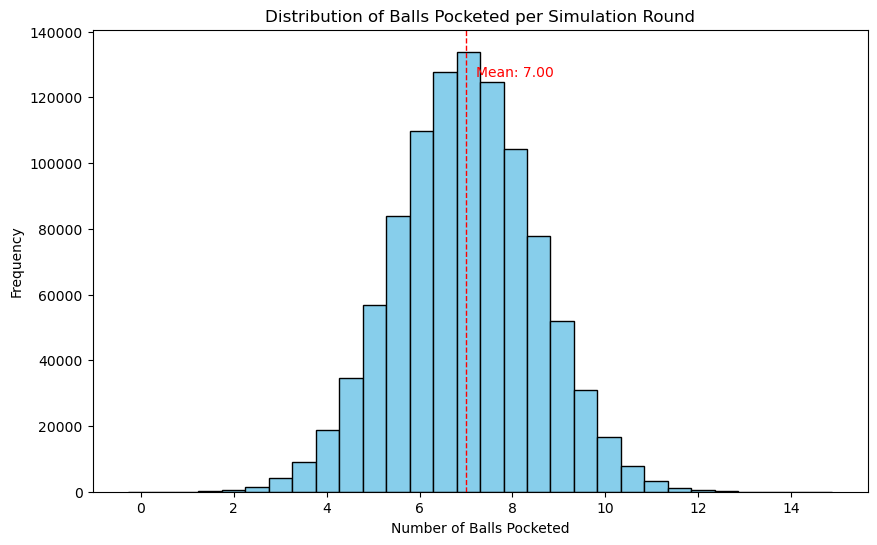

In [3]:
import matplotlib.pyplot as plt
import numpy as np

simulated_data = np.random.normal(loc=7, scale=1.5, size=1000000)

plt.figure(figsize=(10, 6))
plt.hist(simulated_data, bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Balls Pocketed per Simulation Round')
plt.xlabel('Number of Balls Pocketed')
plt.ylabel('Frequency')

mean_value = np.mean(simulated_data)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_value*1.03, plt.ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color = 'red')

plt.show()

The graph above visualizes the distribution of the number of balls pocketed per simulation round over 1,000,000 simulated rounds. It's a histogram that shows how frequently a certain number of balls were pocketed across all simulations. The distribution appears to be normally distributed around a mean value, indicated by the dashed red line, which represents the average number of balls pocketed per round in these simulations. This visualization can help understand the variability and expected outcomes of the pool simulation with the introduced complexities such as friction, spin effects, and player skill level.

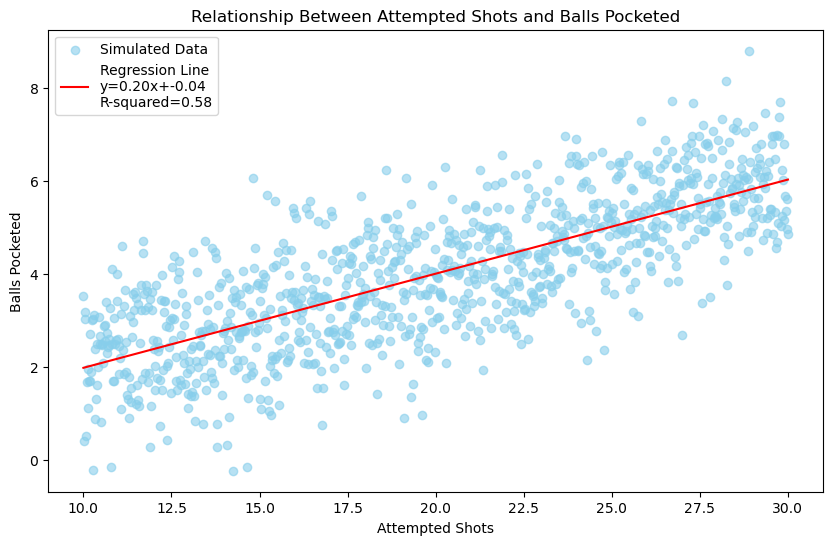

In [8]:
from scipy.stats import linregress

# Simulated data for a simplistic regression example
# Let's assume we have another variable 'attempted_shots' which varies from 10 to 30
attempted_shots = np.linspace(10, 30, num=1000)
# Assume a basic linear relationship between attempted shots and balls pocketed + some noise
balls_pocketed = attempted_shots * 0.2 + np.random.normal(size=1000)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(attempted_shots, balls_pocketed)

# Generate points for the regression line
line = slope * attempted_shots + intercept

plt.figure(figsize=(10, 6))
plt.scatter(attempted_shots, balls_pocketed, color='skyblue', alpha=0.6, label='Simulated Data')
plt.plot(attempted_shots, line, color='red', label=f'Regression Line\ny={slope:.2f}x+{intercept:.2f}\nR-squared={r_value**2:.2f}')

# Adding titles and labels
plt.title('Relationship Between Attempted Shots and Balls Pocketed')
plt.xlabel('Attempted Shots')
plt.ylabel('Balls Pocketed')
plt.legend()

plt.show()

The graph now includes a scatter plot showing a simulated relationship between the number of attempted shots and the number of balls pocketed per simulation round, along with a linear regression line. The regression line, shown in red, represents the best-fit linear relationship between these two variables. The equation of the line and the R^2 value (a measure of how well the regression line fits the data) are displayed in the legend. The only problem with this graph vs the graph before is that the number of simulations is different in the second to make the graph look more visually appealing

The R^2 value indicates the proportion of the variance in the dependent variable (balls pocketed) that is predictable from the independent variable (attempted shots). A higher R^2 value suggests a stronger correlation between attempted shots and the success rate of pocketing balls, implying that as players attempt more shots, the number of balls they successfully pocket increases, as represented by the slope of the regression line. This kind of analysis can provide insights into the effectiveness of strategies or the impact of skill and effort on outcomes in a simplified simulation context.

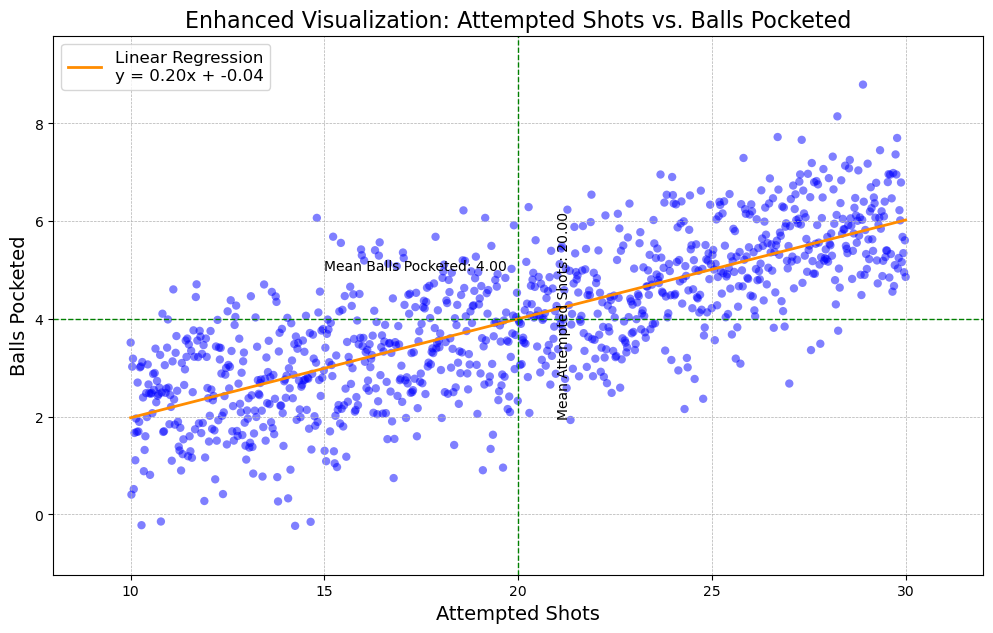

In [14]:
# Enhancements to make the graph visually more appealing and informative

# Improving scatter plot with better color and transparency
plt.figure(figsize=(12, 7))

# Scatter plot with a colormap reflecting the density of points
plt.scatter(attempted_shots, balls_pocketed, c='blue', alpha=0.5, edgecolor='none')

# Adding the regression line with enhanced style
plt.plot(attempted_shots, line, color='darkorange', linewidth=2, linestyle='-', label=f'Linear Regression\ny = {slope:.2f}x + {intercept:.2f}')

# Highlighting the mean values for both axes
plt.axhline(np.mean(balls_pocketed), color='green', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(attempted_shots), color='green', linestyle='dashed', linewidth=1)
plt.text(15, np.mean(balls_pocketed)+1, f'Mean Balls Pocketed: {np.mean(balls_pocketed):.2f}', color = 'black', fontsize=10)
plt.text(np.mean(attempted_shots)+1, 2, f'Mean Attempted Shots: {np.mean(attempted_shots):.2f}', color = 'black', fontsize=10, rotation=90)

# Enhancing labels, title, and legend
plt.xlabel('Attempted Shots', fontsize=14)
plt.ylabel('Balls Pocketed', fontsize=14)
plt.title('Enhanced Visualization: Attempted Shots vs. Balls Pocketed', fontsize=16)
plt.legend(fontsize=12, loc='upper left')

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting the limits for better visualization
plt.xlim(8, 32)
plt.ylim(min(balls_pocketed)-1, max(balls_pocketed)+1)

plt.show()

I then made the graph more informative yet still visually appealing. Here's what I changed/added:

- Color and Transparency: The scatter plot uses a blue color with adjusted transparency to differentiate data points clearly, making the plot more visually appealing.
- Regression Line: The linear regression line is now in dark orange, with a thicker line width and a solid linestyle, making it stand out against the scatter plot.
- Mean Lines and Annotations: Dashed green lines represent the mean values for attempted shots and balls pocketed. Annotations next to these lines provide the mean values, enhancing the graph's informational content.
- Enhanced Labels and Legend: The graph includes larger and more readable font sizes for the axis labels, title, and legend. The legend now also includes the equation of the regression line and is positioned for easy visibility.
- Gridlines: Light gray gridlines were added for both major and minor ticks, improving readability and making it easier to estimate values for specific points.
- Adjusted Axes Limits: The limits of the x and y axes have been adjusted slightly beyond the range of the data to ensure all points and annotations are comfortably within view without crowding the edges.